<h2 style='text-align: center;'>ID5004: AI in Predictive Maintenance, Reliability, and Warranty : End Sem</h2>

<h3 style='text-align: center;'>Author - Aloy Banerjee</h3>
<h3 style='text-align: center;'>Roll No. CH22M503</h3>

In [90]:
# Importing core libraries
import numpy as np
import pandas as pd
import random

# Importing visualization libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Importing statistical libraries
from scipy.stats import f, chi2
from sympy import solve, symbols, N
from scipy.integrate import quad

# Importing survival analysis libraries
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullFitter, WeibullAFTFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import proportional_hazard_test,logrank_test, multivariate_logrank_test
from ISLP.models import ModelSpec as MS
from ISLP import load_data

<h3 style='text-align: center;'>Part 1</h3>

### Q1

In [59]:
tk = np.array([0, 1, 2, 3, 4])
yk = np.array([1.87, 5.4, 6.86, 12.76, 19.89])

In [60]:
def design_matrix(x, L=1):
    return np.column_stack((np.ones(len(x)), x))

def predicted_values(x, theta):
    X = design_matrix(x)
    return X @ theta

def true_values(x, theta):
    X = design_matrix(x)
    return X @ theta

In [61]:
x_observed = tk
y_observed = yk

In [62]:
theta_estimated = np.linalg.lstsq(design_matrix(x_observed,L), y_observed, rcond=None)[0]

In [63]:
theta_estimated

array([0.676, 4.34 ])

### Q16

In [64]:
# Create a numpy array representing the covariance matrix
covarince_mat = np.array([[1.01, 0.25, -0.02], [0.025, 1.01, 0.04], [-0.017, 0.04, 1.01]])
# Calculate the eigenvalues and corresponding eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covarince_mat)
# Sort the indices of the eigenvalues in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
# Create a sorted list of eigenvalues
eigenvalues_sorted = eigenvalues[eigenvalue_indices]
# Create a sorted matrix of eigenvectors according to the sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, eigenvalue_indices]
# Create a diagonal matrix of the sorted eigenvalues
Lambda = np.diag(eigenvalues_sorted)
# Create an inverse of the diagonal matrix Lambda by taking the reciprocal of each element on the diagonal 
# This is equivalent to creating an inverse of a diagonal matrix, which is simply the reciprocal of 
# each diagonal element
Lambda_inv = np.diag(1 / np.diag(Lambda)) 
# Define a new data point for which we are calculating the Hotelling's T^2 statistic
new_data_point = np.array([0.724, 0.649, 1.857])
# Calculate the centered and scaled data point 'Z' by multiplying the inverse square root of Lambda,
# transposed sorted eigenvectors,
# and transposed new data point
Z = ((np.linalg.inv(np.sqrt(Lambda))).dot(eigenvectors_sorted.T)).dot(new_data_point.T)
# Calculate the Hotelling's T^2 statistic by performing the dot product of transposed Z and Z itself
# This is equivalent to summing the square of each element of Z
T_squared = Z.T @ Z
# Print the computed Hotelling's T^2 statistic
print('T Squared Value: ', T_squared)

T Squared Value:  1.6237874863769912


### Q18

In [65]:
covarince_mat_1 = np.array([[1.01, 0.25, -0.02], [0.025, 1.01, 0.04], [-0.017, 0.04, 1.01]])
covarince_mat_2 = np.array([[11, 2, -2], [1, 3, 4], [-1, 2, 1]])

def pca_similarity_index(covariance_mat1, covariance_mat2):
    _, eigenvecs1 = np.linalg.eig(covariance_mat1)
    _, eigenvecs2 = np.linalg.eig(covariance_mat2)

    # Sort the eigenvalues and eigenvectors in descending order
    idx1 = np.argsort(eigenvecs1)[::-1]
    eigenvecs1_sorted = eigenvecs1[:, idx1]
    idx2 = np.argsort(eigenvecs2)[::-1]
    eigenvecs2_sorted = eigenvecs2[:, idx2]

    # Compute the PCA similarity index
    similarity_index = np.sum(np.abs(np.dot(eigenvecs1_sorted, eigenvecs2_sorted.T)))

    return similarity_index

In [66]:
similarity_index = pca_similarity_index(covarince_mat_1, covarince_mat_2)
print("Similarity Index:", similarity_index)

Similarity Index: 34.261999058555546


<h3 style='text-align: center;'>Part 2</h3>

### Q2.b

In [96]:
t1 = np.array([3, 2, 1])
t2 = np.array([-1, 1, -2])
y = np.array([-4, 1, -5])

def design_matrix(x1, x2, L=1):
    return np.column_stack((x1, x2))

def predicted_values(x, theta):
    X = design_matrix(x)
    return X @ theta

def true_values(x, theta):
    X = design_matrix(x)
    return X @ theta

x1_observed = t1
x2_observed = t2
y_observed = y

theta_estimated = np.linalg.lstsq(design_matrix(x1_observed, x2_observed), y_observed, rcond=None)[0]

print('Answer Q2b:\n-----------\n')
print('x1:', theta_estimated[0])
print('x2:', theta_estimated[1])

Answer Q2b:
-----------

x1: -0.6000000000000005
x2: 2.1999999999999997


### Q6 

In [55]:
# Observed data
time1 = np.array([0, 1, 4, 9, 14])  # Time data points 1
time2 = np.array([0, 1, 8, 17, 64])  # Time data points 2
output_data = np.array([6, 6.3, 7.6, 10.5, 14])  # Observed output data

# Function to create the design matrix
def design_matrix(x1, x2, L=1):
    return np.column_stack((np.ones(len(x1)), x1, x2))

# Assign observed data to local variables
observed_time1 = time1
observed_time2 = time2
observed_output = output_data

# Calculate the estimated parameters using least squares linear regression
estimated_params = np.linalg.lstsq(design_matrix(observed_time1, observed_time2), observed_output, rcond=None)[0]

# Output the calculated parameters
print('Calculated Parameters:')
print('----------------------')
print(f'Parameter 1: {estimated_params[0]:.2f}')  # Print estimated parameter 1 with 2 decimal places
print(f'Parameter 2: {estimated_params[1]:.2f}')  # Print estimated parameter 2 with 2 decimal places
print(f'Parameter 3: {estimated_params[2]:.2f}')  # Print estimated parameter 3 with 2 decimal places


Calculated Parameters:
----------------------
Parameter 1: 5.84
Parameter 2: 0.45
Parameter 3: 0.03


## Q7

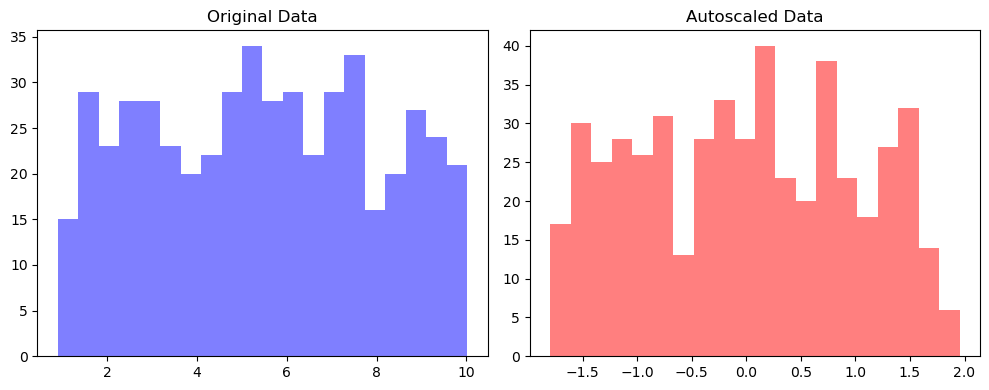

Log-rank test p-value: 0.09194505516451323
T squared for x1: [[5.12665231]]
T squared for x2: [[4.9746185]]


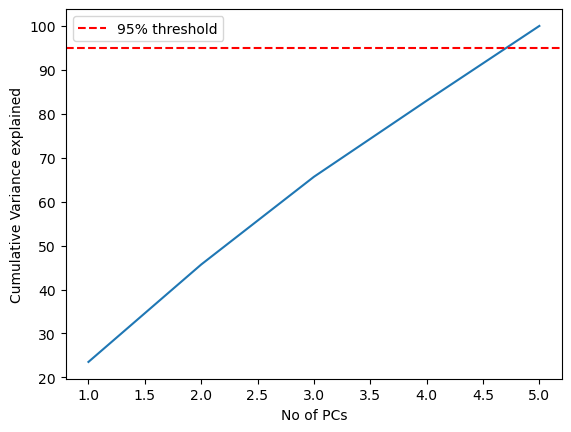

T^2 threshold: 9.236356899781123


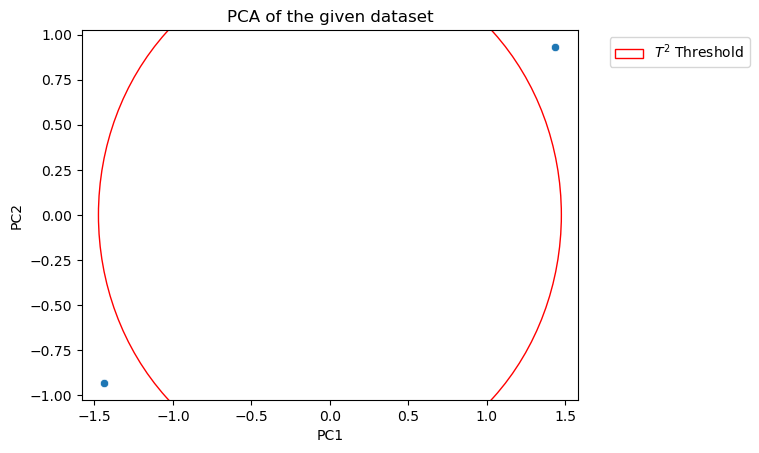

The Q statistics are:
 [5.03019794e-29 3.42348493e-29 7.52315401e-29 1.95500543e-29
 6.43572332e-29 8.20641311e-29 2.37507610e-28 1.61272156e-29
 2.44777025e-29 4.64918663e-29 8.00731552e-29 1.13957059e-29
 4.36232112e-30 2.33685102e-28 3.56735251e-29 1.24680051e-28
 9.24298133e-29 2.77449064e-29 3.77738576e-29 8.68377773e-29
 3.58095728e-29 1.35204304e-28 2.27702994e-29 8.61564654e-29
 1.95656296e-29 2.01113640e-28 5.57096451e-29 7.99217631e-29
 2.69134592e-29 1.26493176e-28 7.55891551e-29 2.01579902e-28
 2.07605542e-28 1.92126439e-28 8.30273174e-30 3.04524267e-29
 7.25206161e-29 9.97088384e-29 2.48529015e-29 1.10847445e-28
 8.92702168e-29 1.79482178e-29 1.21223865e-28 4.35861221e-29
 7.92750737e-29 1.42033775e-29 1.13820640e-28 1.54188071e-28
 2.97465395e-29 2.17571998e-28 7.76046209e-29 5.83416452e-29
 8.01226956e-30 1.40519820e-28 1.85320480e-28 1.44348435e-29
 1.85630710e-29 4.86389427e-29 1.00512525e-29 4.62460499e-29
 2.15198232e-29 2.54753023e-29 1.36232221e-29 1.72797882e-28
 

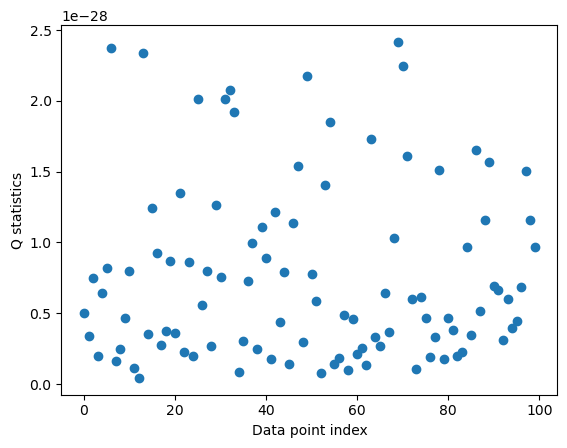

In [92]:
# Load the data
data = pd.read_csv('sample_classification_3.csv')

# Defining the dependent and independent variables
X = data.drop(axis=1, columns='target')
y = data['target']

X_arr = np.array(X)

# Autoscaling and visualization
X_scaled = preprocessing.scale(X_arr)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot original data
axes[0].hist(X_arr.flatten(), bins=20, color='blue', alpha=0.5)
axes[0].set_title('Original Data')

# Plot autoscaled data
axes[1].hist(X_scaled.flatten(), bins=20, color='red', alpha=0.5)
axes[1].set_title('Autoscaled Data')

# Set plot labels and layout
plt.tight_layout()
plt.show()

# Calculating sample covariance
cov_matrix = np.cov(X_scaled.T)

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_indices]
eigenvectors_sorted = eigenvectors[:, eigenvalue_indices]

Lambda = np.diag(eigenvalues_sorted)

Lambda_inv = np.diag(1 / np.diag(Lambda))

V = eigenvectors_sorted
V_T = eigenvectors_sorted.T

# Calculate T^2 statistic for each data point
t_squared_values_train = []
for i in range(len(X_scaled)):
    x = X_scaled[i, :].reshape((5, 1))
    t_squared = x.T @ V @ Lambda_inv @ V.T @ x
    t_squared_values_train.append(t_squared)

# Log-rank test p-value
results = chi2.sf(np.max(t_squared_values_train), df=5)
print("Log-rank test p-value:", results)

# Outlier threshold
alpha = 0.1
n = X_scaled.shape[0]
a = 5
f_alpha = f.ppf(1 - alpha, a, n - a - 1)
threshold_outl = ((n - 1) ** 2 * (a / (n - a - 1)) * f_alpha) / (n * (1 + (a / (n - a - 1))))

x1 = np.array([12.91, 11.16, 4.590, 13.17, 5.166])
x1_scaled = preprocessing.scale(x1.reshape(-1, 1))

# Calculating T squared for x1
T_2 = x1_scaled.T @ V @ Lambda_inv @ V.T @ x1_scaled
print("T squared for x1:", T_2)

x2 = np.array([2.826, 7.106, 47.29, 9.46, 1.548])
x2_scaled = preprocessing.scale(x2.reshape(-1, 1))

# Calculating T squared for x2
T_2 = x2_scaled.T @ V @ Lambda_inv @ V.T @ x2_scaled
print("T squared for x2:", T_2)

# Perform PCA on the dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative variance explained by principal components
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.axhline(y=95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('No of PCs')
plt.ylabel('Cumulative Variance explained')
plt.legend()
plt.show()

# T^2 threshold
confidence_level = 0.9
T_2_alpha = chi2.ppf(confidence_level, df=5)
print("T^2 threshold:", T_2_alpha)

# New data points
x_new = np.array([[12.91, 11.16, 4.590, 13.17, 5.166], [2.826, 7.106, 47.29, 9.46, 1.548]])
x_new_scaled = preprocessing.scale(x_new)

# Transform new data using PCA
X_pca_test = pca.transform(x_new_scaled)
y_labels = [i for i in y]

# Creating a scatter plot of the transformed data
sns.scatterplot(x=X_pca_test[:, 0], y=X_pca_test[:, 1])

# Adding the T2 threshold ellipse
ellipse = Ellipse(xy=np.mean(X_pca_test, axis=0), width=2 * np.sqrt(T_2_alpha) * np.sqrt(pca.explained_variance_ratio_[0]),
                  height=2 * np.sqrt(T_2_alpha) * np.sqrt(pca.explained_variance_ratio_[1]), edgecolor='red', facecolor='none',
                  label='$T^2$ Threshold')

# Adding the ellipse to the plot
plt.gca().add_patch(ellipse)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the given dataset')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Show the plot
plt.show()

# Calculating the Q statistics
I = np.identity(5)
Q_stat_values = []
for data_point in X_scaled:
    r = (I - V @ V_T) @ data_point.reshape((5, 1))
    Q = r.T @ r
    Q_stat_values.append(Q[0][0])

# Converting the Q statistics to a numpy array
Q_stat_values = np.array(Q_stat_values)

# Printing the Q statistics
print("The Q statistics are:\n", Q_stat_values)

# Plotting the Q statistics
plt.scatter(range(len(Q_stat_values)), Q_stat_values)
plt.xlabel('Data point index')
plt.ylabel('Q statistics')
plt.show()


## Q8

In [75]:
data = pd.read_csv('Q2_odd.csv')

#### a. Plot the survival curve for the dataset

Text(0.5, 1.0, 'Survival curve')

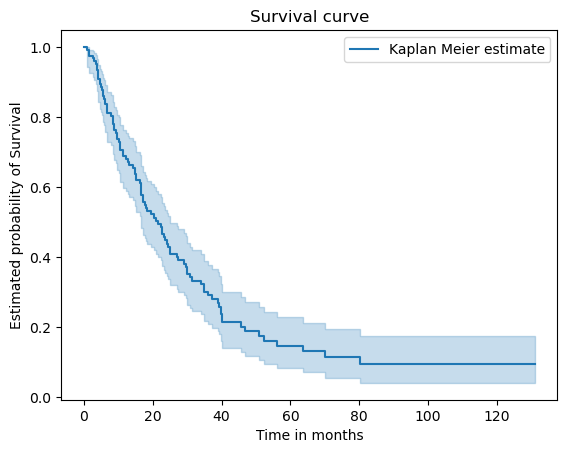

In [82]:
# Creating new object
km = KaplanMeierFitter()

# Fitting the data to the estimator and visualizing the survival curve
# Pointwise Confidence interval is set to 90% by default
km_brain = km.fit(data['time'], data['status'])
km_brain.plot(label='Kaplan Meier estimate')

plt.xlabel('Time in months')
plt.ylabel('Estimated probability of Survival')
plt.title('Survival curve')

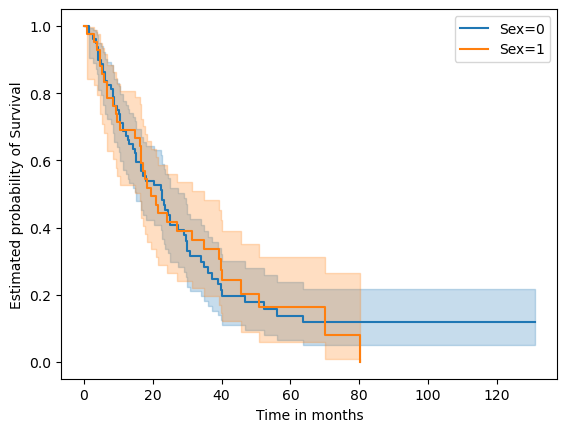

In [83]:
# Initializing a directory to store data frames for each sex category
by_mech = {}

for sex, df in data.groupby('posres'):
    by_mech[sex] = df
    # Fitting the data to the estimator and visualizing the survival curve
    km_sex = km.fit(df['time'], df['status'])
    km_sex.plot(label = 'Sex=%s' % sex)
    plt.xlabel('Time in months')
    plt.ylabel('Estimated probability of Survival')


# Add legend to differentiate between different categories
plt.legend()
plt.show()

#### b. Perform log-rank test and report the p-value

In [78]:
logrank_test(by_mech[0]['time'], by_mech[1]['time'], by_mech[0]['status'], by_mech[1]['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05

#### c. Fit the data to the Cox’s proportional hazards model with linear and nonlinear terms for the hazard function h(t/xi). The nonlinear terms should be xixj form, for example, x1^2 , x2^2,…, x1x3, x2x3,….

In [79]:
coxph = CoxPHFitter
sex_df = data[['time', 'status', 'posres']]
# Design matrix for the Cox model using model specification class (MS) with sex as the only predictor
model_df = MS(['time', 'status', 'posres'],intercept=False).fit_transform(sex_df)
cox_fit = coxph().fit(model_df , 'time','status')
# cox_fit.summary[['coef', 'se(coef)', 'p']]
cox_fit.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
posres,-0.008852,0.991187,0.213986,-0.428257,0.410553,0.651644,1.507651,0.0,-0.041368,0.967003,0.048408


#### d. Determine the significant contribution of the variables

In [80]:
# cleaning the data
cleaned = data.dropna()
cleaned = cleaned.drop(columns=['mech'])
# Design matrix
all_MS = MS(cleaned.columns , intercept=False)
all_df = all_MS.fit_transform(cleaned)
fit_all = coxph().fit(all_df ,'time','status')
fit_all.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
posres,0.501158,1.650631,0.233445,0.043614,0.958702,1.044579,2.608309,0.0,2.146790,3.181001e-02,4.974375
multi,-0.031527,0.968965,0.290175,-0.600260,0.537206,0.548669,1.711220,0.0,-0.108648,9.134819e-01,0.130552
clinend,0.493307,1.637724,0.313078,-0.120315,1.106929,0.886641,3.025056,0.0,1.575668,1.151024e-01,3.119010
sampsize,0.000007,1.000007,0.000014,-0.000021,0.000035,0.999979,1.000035,0.0,0.471950,6.369624e-01,0.650720
budget,0.003589,1.003596,0.002515,-0.001341,0.008519,0.998660,1.008556,0.0,1.426866,1.536186e-01,2.702575
impact,0.052859,1.054281,0.008889,0.035437,0.070280,1.036073,1.072809,0.0,5.946755,2.735111e-09,28.445753


In [81]:
cox_fit.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05

### Q9

In [93]:
from scipy.integrate import quad

# Function for the hazard rate (failure rate) 𝜆(t)
def calculate_hazard_rate(t, 𝜆, k):
    return 𝜆 * k * (𝜆 * t) ** (k - 1)

# Given parameters for the Weibull distribution
𝜆_parameter = 0.5
k_parameter = 0.1

time_t = 3

# Interval [2, t+3]
interval_start = 2
interval_end = time_t + 3

# Calculate the average failure rate using integration
average_failure_rate, _ = quad(calculate_hazard_rate, interval_start, interval_end, args=(𝜆_parameter, k_parameter))

print("Average failure rate over the interval [2, t+3]:", average_failure_rate)



Average failure rate over the interval [2, t+3]: 0.11612317403390443
